In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Logistic Regression Plot

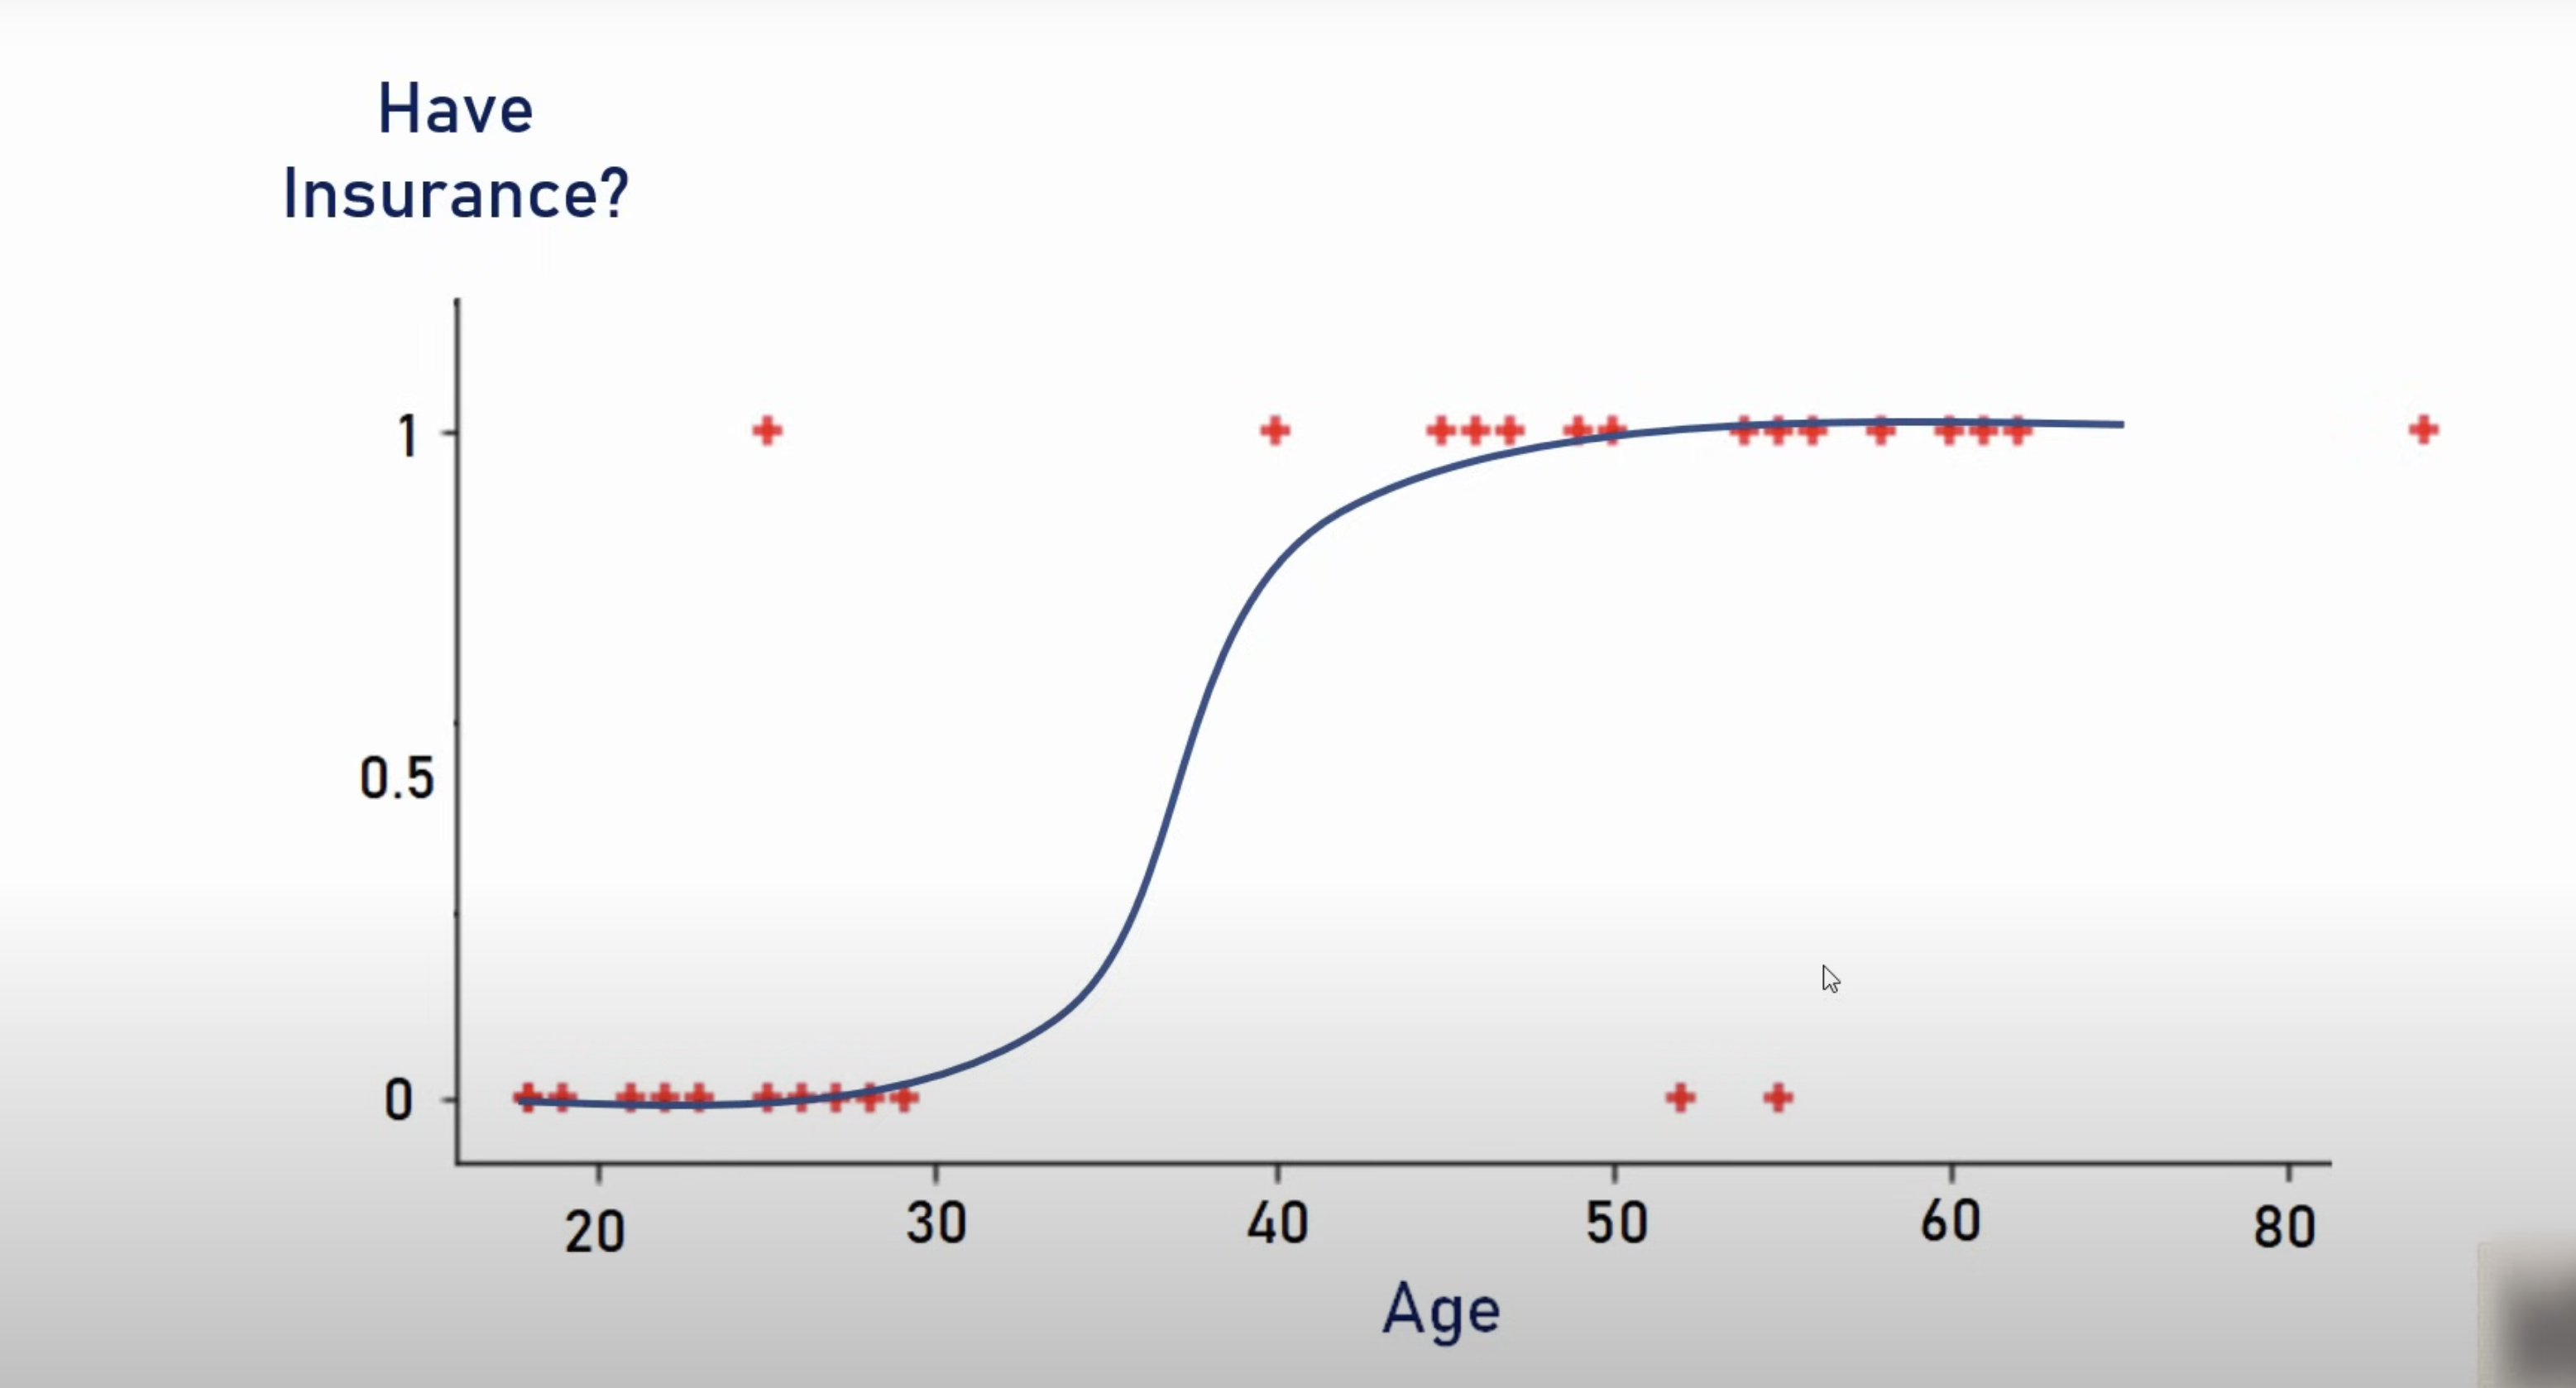

In [ ]:
df = pd.read_csv("sample_data/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


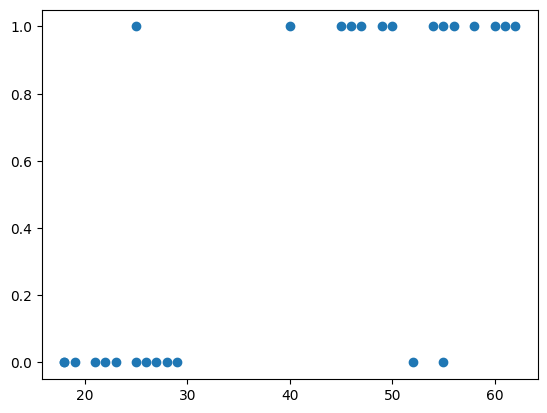

In [ ]:
plt.scatter(df['age'], df['bought_insurance'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size=0.1)

In [ ]:
x_test

,age
7,60
4,46
13,29


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([1, 1, 0])

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
df = pd.read_csv("sample_data/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
numeric_columns = ['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident','left','promotion_last_5years']
df[numeric_columns].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0.0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1.0,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Strong correlation between left and satisfaction_level, average_monthly_hours, promotion_last_5_years

<Axes: xlabel='salary'>

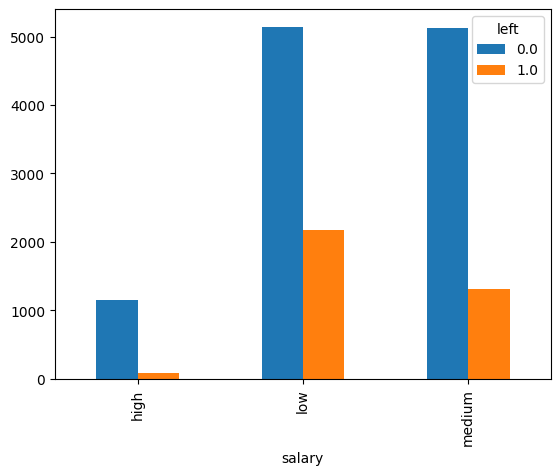

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


Correlation exists between salary and left

<Axes: xlabel='Department'>

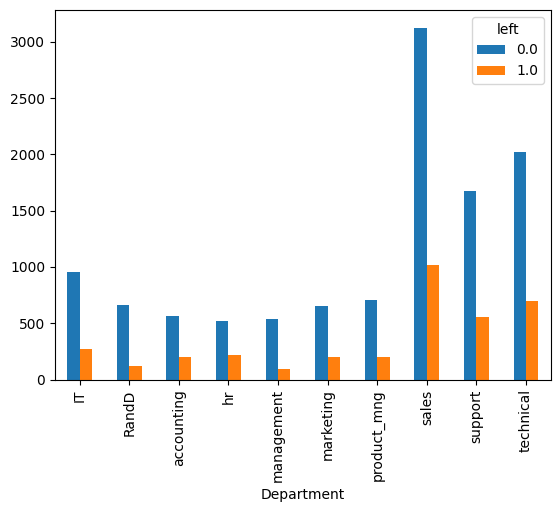

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')


In [37]:
selected_columns = ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary','left']
df[selected_columns]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1.0
1,0.80,262,0,medium,1.0
2,0.11,272,0,medium,1.0
3,0.72,223,0,low,1.0
4,0.37,159,0,low,1.0
...,...,...,...,...,...
14994,0.40,151,0,low,1.0
14995,0.37,160,0,low,1.0
14996,0.37,143,0,low,1.0
14997,0.11,280,0,low,1.0


In [31]:
dummies = pd.get_dummies(df.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [38]:
merged = pd.concat([df[selected_columns], dummies], axis='columns')
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,low,1.0,False,True,False
1,0.80,262,0,medium,1.0,False,False,True
2,0.11,272,0,medium,1.0,False,False,True
3,0.72,223,0,low,1.0,False,True,False
4,0.37,159,0,low,1.0,False,True,False
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1.0,False,True,False
14995,0.37,160,0,low,1.0,False,True,False
14996,0.37,143,0,low,1.0,False,True,False
14997,0.11,280,0,low,1.0,False,True,False


In [39]:
final = merged.drop(['salary','medium'], axis = 'columns') # dropping one column to save from dummy variable problem
final

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low
0,0.38,157,0,1.0,False,True
1,0.80,262,0,1.0,False,False
2,0.11,272,0,1.0,False,False
3,0.72,223,0,1.0,False,True
4,0.37,159,0,1.0,False,True
...,...,...,...,...,...,...
14994,0.40,151,0,1.0,False,True
14995,0.37,160,0,1.0,False,True
14996,0.37,143,0,1.0,False,True
14997,0.11,280,0,1.0,False,True


In [41]:
x = final[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low']]
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True
...,...,...,...,...,...
14994,0.40,151,0,False,True
14995,0.37,160,0,False,True
14996,0.37,143,0,False,True
14997,0.11,280,0,False,True


In [42]:
y = final[['left']]
y

,left
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
14994,1.0
14995,1.0
14996,1.0
14997,1.0


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
1603,0.44,145,0,False,True
1190,0.11,264,0,False,True
14009,0.61,145,1,False,False
1523,0.42,148,0,False,True
12252,0.19,192,0,False,True
...,...,...,...,...,...
3505,0.50,266,0,False,True
782,0.72,245,0,False,True
9443,0.57,189,0,False,True
4650,0.82,219,0,False,False


In [49]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
model.score(x_test,y_test)

0.7794285714285715